In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
# %matplotlib inline

In [2]:
df = pd.read_excel('D://data_analysis/EDA_super_market_sales/sample_-_superstore.xls')
df.tail()

,Unnamed: 0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,...,category,sub_category,product_name,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost
9989,9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,...,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028,8.416,1.3676,7.0484
9990,9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,45.980,7.8166,38.1634
9991,9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,129.288,9.6966,119.5914
9992,9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200,7.400,3.3300,4.0700
9993,9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,...,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480,121.580,36.4740,85.1060


# Renaming columns

In [3]:
cols = df.columns
cols

Index(['Unnamed: 0', 'row_id', 'order_id', 'order_date', 'ship_date',
       'ship_mode', 'customer_id', 'customer_name', 'segment', 'country',
       'city', 'state', 'postal_code', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'unit_price', 'unit_profit', 'unit_cost'],
      dtype='object')

In [4]:
new_cols = [x.lower().replace(' ','_').replace('-','_') for x in cols]
new_cols

['unnamed:_0',
 'row_id',
 'order_id',
 'order_date',
 'ship_date',
 'ship_mode',
 'customer_id',
 'customer_name',
 'segment',
 'country',
 'city',
 'state',
 'postal_code',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name',
 'sales',
 'quantity',
 'discount',
 'profit',
 'unit_price',
 'unit_profit',
 'unit_cost']

In [5]:
mapper = {} # the mapper to replace the old col_names with new col_names
for x,y in zip(cols,new_cols):
    mapper[x] = y
df.rename(columns=mapper, inplace=True)

In [6]:
df.head(1)

,unnamed:_0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,...,category,sub_category,product_name,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost
0,0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,130.98,20.9568,110.0232


### Data exploring

In [7]:
df.describe()

,unnamed:_0,row_id,postal_code,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4996.500000,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,60.919569,7.799372,53.120197
std,2885.163629,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,142.927440,56.074974,122.251398
min,0.000000,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.336000,-1319.995600,0.544500
25%,2498.250000,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,5.470000,0.722800,3.473600
50%,4996.500000,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,16.270000,2.767000,12.933600
75%,7494.750000,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,63.940000,8.703200,54.522000
max,9993.000000,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,3773.080000,1679.995200,4074.926400


#### Searching for duplicates

In [49]:
duplicate_values = df.duplicated()
df[duplicate_values]

,unnamed:_0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,...,category,sub_category,product_name,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost


## No duplicates

#### Searching for nulls

In [9]:
df.isnull().count().count()

25

In [10]:
# dropping nulls
df.dropna(inplace=True)

In [52]:
# Saving data after cleaning
df.to_excel('D://data_analysis/EDA_super_market_sales/data_after_cleaning.xls', index=False)

### Categories' comparison

In [12]:
categories = df.groupby('category').sum()
x_axes = categories.index
categories

,unnamed:_0,row_id,postal_code,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost
category,,,,,,,,,,
Furniture,10691205,10693326,118196026,741999.7953,8028,368.89,18451.2728,192701.5211,4105.4384,188596.0827
Office Supplies,30004509,30010535,330772872,719047.0320,22906,947.80,122490.8008,193769.5140,35065.6633,158703.8507
Technology,9239307,9241154,102603754,836154.0330,6939,244.40,145454.9481,222359.1380,38775.8214,183583.3166


No handles with labels found to put in legend.


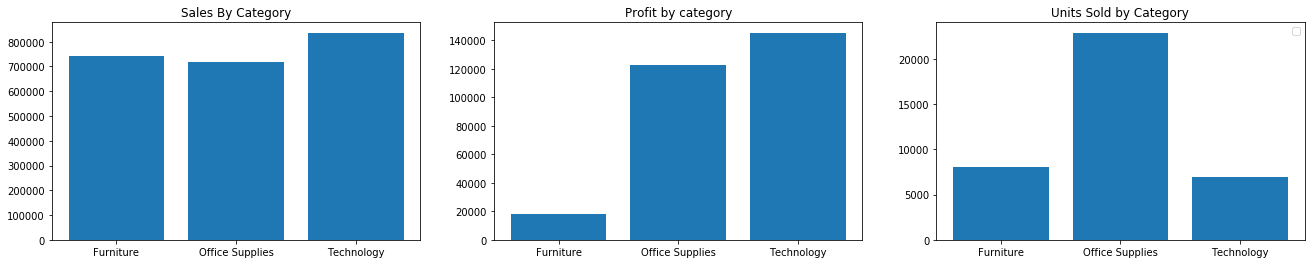

In [13]:
fig, (ax, ax1, ax2) = plt.subplots(nrows=1,ncols=3)
# plt.figure(figsize=(1000,4000))
ax.bar(x_axes, categories['sales'],label=categories['sales'])
# ax.set_ylabel('Sales')
ax.set_title('Sales By Category')

ax1.bar(x_axes, categories['profit'])
ax1.set_title('Profit by category')

ax2.bar(x_axes, categories['quantity'])
ax2.set_title('Units Sold by Category')
plt.subplots_adjust(left=.1,right=3)
plt.legend()
plt.show()


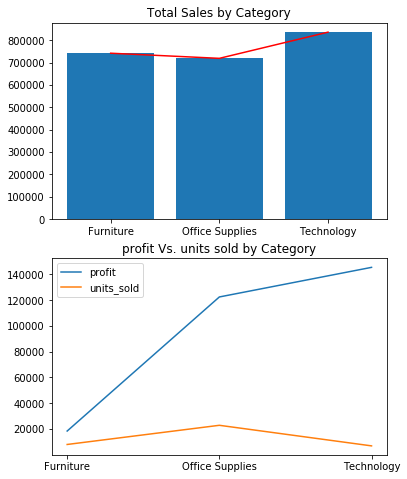

In [14]:
fig, (ax, ax1) = plt.subplots(nrows=2,ncols=1)
# plt.figure(figsize=(50,90))
ax.bar(x_axes,categories['sales'], label='Sales')
ax.plot(categories['sales'],color='r')
ax.set_title('Total Sales by Category')
ax1.plot(categories['profit'], label='profit')
ax1.plot(categories['quantity'], label='units_sold')
ax1.set_title('profit Vs. units sold by Category')
plt.legend()
plt.subplots_adjust(top=2,bottom=.5)
plt.show()

### By region comaprison

In [15]:
regions = df.groupby('region').sum()
region_names = regions.index
region_names

Index(['Central', 'East', 'South', 'West'], dtype='object', name='region')

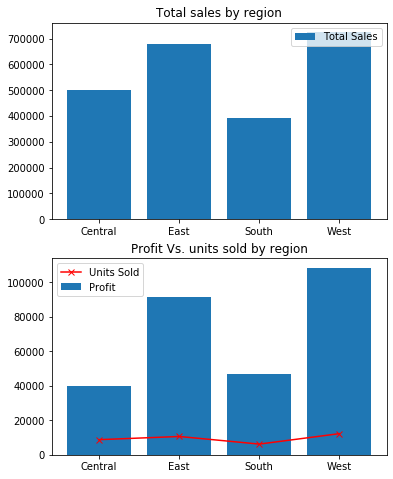

In [16]:
fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1)
ax.bar(region_names, regions['sales'], label='Total Sales')
ax.set_title('Total sales by region')
ax1.bar(region_names,regions['profit'], label='Profit')
ax1.plot(regions['quantity'],marker='x',c='r',label='Units Sold')
ax1.set_title('Profit Vs. units sold by region')
ax.legend()
ax1.legend(loc='upper left')
plt.subplots_adjust(top=2,bottom=.5)
plt.show()

In [17]:
shipment_categories = df.groupby('category').sum()

In [18]:
shipment_categories

,unnamed:_0,row_id,postal_code,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost
category,,,,,,,,,,
Furniture,10691205,10693326,118196026,741999.7953,8028,368.89,18451.2728,192701.5211,4105.4384,188596.0827
Office Supplies,30004509,30010535,330772872,719047.0320,22906,947.80,122490.8008,193769.5140,35065.6633,158703.8507
Technology,9239307,9241154,102603754,836154.0330,6939,244.40,145454.9481,222359.1380,38775.8214,183583.3166


## Digging deeper in products

In [19]:
products = df.groupby('sub_category')

In [20]:
products['sales', 'quantity', 'profit'].sum()

,sales,quantity,profit
sub_category,,,
Accessories,167380.3180,2976,41936.6357
Appliances,107532.1610,1729,18138.0054
Art,27118.7920,3000,6527.7870
Binders,203412.7330,5974,30221.7633
Bookcases,114879.9963,868,-3472.5560
Chairs,328449.1030,2356,26590.1663
Copiers,149528.0300,234,55617.8249
Envelopes,16476.4020,906,6964.1767
Fasteners,3024.2800,914,949.5182


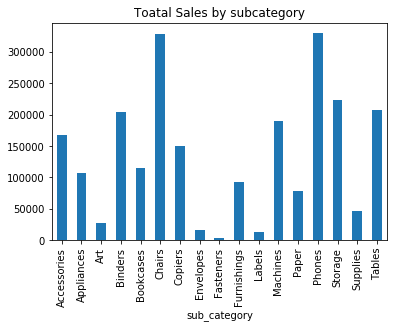

In [21]:
products['sales'].sum().plot(kind='bar').set_title('Toatal Sales by subcategory')
plt.figure.figsize=(50,200)
plt.show()

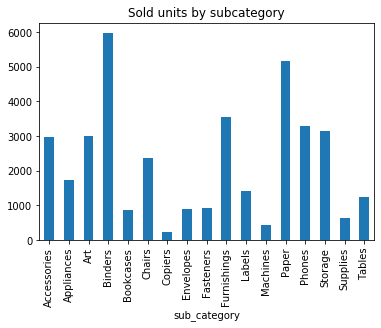

In [22]:
products['quantity'].sum().plot(kind='bar').set_title('Sold units by subcategory')
plt.figure.figsize=(50,200)
plt.show()

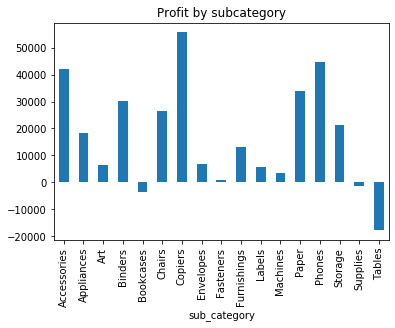

In [23]:
products['profit'].sum().plot(kind='bar').set_title('Profit by subcategory')
plt.figure.figsize=(50,200)
plt.show()

### It is obvious that we have loss in 3 subcategories

In [24]:
# Categories that cause loss
mask = products['profit'].sum() < 0
mask[mask]

sub_category
Bookcases    True
Supplies     True
Tables       True
Name: profit, dtype: bool

In [25]:
# How uch loss?
losses = products['profit'].sum().sort_values().head(3)
losses

sub_category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Name: profit, dtype: float64

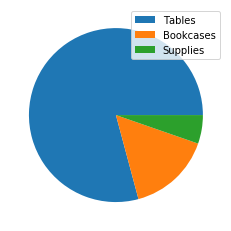

In [26]:
# Showing in graphs
ax = plt.pie(abs(losses.values))
plt.legend(labels=losses.index)
plt.show()

## Bookcases, Supplies and Tables cost the company a loss
### Why?
### Should we stop production?
### What are our alternatives?

## Searching for outliers

In [27]:
# further more
products['profit'].max() # max profit

sub_category
Accessories     829.3754
Appliances      793.7160
Art             112.5740
Binders        4946.3700
Bookcases      1013.1270
Chairs          770.3520
Copiers        8399.9760
Envelopes       204.0714
Fasteners        21.8880
Furnishings     387.5676
Labels          385.3752
Machines       2799.9840
Paper           352.2960
Phones         1228.1787
Storage         792.2691
Supplies        327.5060
Tables          629.0100
Name: profit, dtype: float64

In [28]:
# min profit
products['profit'].min()

sub_category
Accessories     -75.5958
Appliances    -1181.2824
Art               0.1533
Binders       -3701.8928
Bookcases     -1665.0522
Chairs         -630.8820
Copiers          59.9980
Envelopes         0.5508
Fasteners       -11.8256
Furnishings    -427.4500
Labels            0.6786
Machines      -6599.9780
Paper             1.0700
Phones         -386.3916
Storage        -337.8060
Supplies      -1049.3406
Tables        -1862.3124
Name: profit, dtype: float64

In [29]:
# profit range
profit_range = products['profit'].max() - products['profit'].min()
profit_range

sub_category
Accessories     904.9712
Appliances     1974.9984
Art             112.4207
Binders        8648.2628
Bookcases      2678.1792
Chairs         1401.2340
Copiers        8339.9780
Envelopes       203.5206
Fasteners        33.7136
Furnishings     815.0176
Labels          384.6966
Machines       9399.9620
Paper           351.2260
Phones         1614.5703
Storage        1130.0751
Supplies       1376.8466
Tables         2491.3224
Name: profit, dtype: float64

In [30]:
profit_range.sort_values()

sub_category
Fasteners        33.7136
Art             112.4207
Envelopes       203.5206
Paper           351.2260
Labels          384.6966
Furnishings     815.0176
Accessories     904.9712
Storage        1130.0751
Supplies       1376.8466
Chairs         1401.2340
Phones         1614.5703
Appliances     1974.9984
Tables         2491.3224
Bookcases      2678.1792
Copiers        8339.9780
Binders        8648.2628
Machines       9399.9620
Name: profit, dtype: float64

# Highlight operations with negative profit or losing ones

In [31]:
causing_loss_opertions = df.query('profit <= 0')
causing_loss_opertions.head()

,unnamed:_0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,...,category,sub_category,product_name,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost
3,3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,-76.6062,268.1217
14,14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,...,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,13.7620,-24.7716,38.5336
15,15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,...,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,0.8480,-1.2720,2.1200
23,23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,...,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,35.6860,-0.5098,36.1958
27,27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,...,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,440.4900,-237.8646,678.3546


In [32]:
# Number of non profitable operations
causing_loss_opertions.shape[0]

1936

# let's get backwards again
### what is the profit per unit sold?
### what if the calculations were wrong? Should I ignore negative numbers?


In [33]:
# finding profit per unit, unit cost and unit price
# unit_price = total_sales / quantity
df['unit_price'] = df['sales'] / df['quantity']
# unit_profit = profit / quantity
df['unit_profit'] = df['profit'] / df['quantity']
#  unit_cost = unit_price - unit_profit
df['unit_cost'] = df['unit_price'] - df['unit_profit']

In [34]:
# lets see
df.head(2)

,unnamed:_0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,...,category,sub_category,product_name,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost
0,0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,130.98,20.9568,110.0232
1,1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,243.98,73.1940,170.7860


In [35]:
causing_loss_opertions = df.query('profit <= 0')
causing_loss_opertions.head()

,unnamed:_0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,...,category,sub_category,product_name,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost
3,3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,-76.6062,268.1217
14,14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,...,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,13.7620,-24.7716,38.5336
15,15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,...,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,0.8480,-1.2720,2.1200
23,23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,...,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,35.6860,-0.5098,36.1958
27,27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,...,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,440.4900,-237.8646,678.3546


# Pick a unit to test suppose (FUR-BO-10001798):
 ### - Compare once with profit and with loss.
 ### - Get a clue.

In [36]:
prod_fur_bo_10001798 = df.query('product_id == "FUR-BO-10001798"')
prod_fur_bo_10001798

,unnamed:_0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,...,category,sub_category,product_name,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost
0,0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.00,41.9136,130.980,20.9568,110.0232
5399,5399,5400,CA-2016-117681,2016-04-09,2016-04-14,Standard Class,HF-14995,Herbert Flentye,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,556.665,5,0.15,6.5490,111.333,1.3098,110.0232
8634,8634,8635,CA-2017-159793,2017-08-25,2017-08-29,Standard Class,SV-20365,Seth Vernon,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,130.980,2,0.50,-89.0664,65.490,-44.5332,110.0232
9334,9334,9335,CA-2017-110198,2017-05-01,2017-05-02,First Class,AG-10900,Arthur Gainer,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,314.352,3,0.20,-15.7176,104.784,-5.2392,110.0232


# Findings for FUR-BO-10001798 :
### - Unit cost is constant = 110.0232.
### - Unit price without discount = 130.980
### - So the margin profit is 130.980 - 110.0232 = 20.9568
### - Margin profit percentage of sales price is 20.9568 / 130.980 = .16

# Another piece of tables

In [37]:
tables_df = df.query('sub_category == "Tables"')
tables_df.head()

,unnamed:_0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,...,category,sub_category,product_name,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost
3,3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,-76.6062,268.1217
10,10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,189.5760,9.4788,180.0972
24,24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649,348.2100,80.0883,268.1217
117,117,118,CA-2015-110457,2015-03-02,2015-03-06,Standard Class,DK-13090,Dave Kipp,Consumer,United States,...,Furniture,Tables,Hon Racetrack Conference Tables,787.5300,3,0.00,165.3813,262.5100,55.1271,207.3829
125,125,126,US-2014-134614,2014-09-20,2014-09-25,Standard Class,PF-19165,Philip Fox,Consumer,United States,...,Furniture,Tables,Bevis 44 x 96 Conference Tables,617.7000,6,0.50,-407.6820,102.9500,-67.9470,170.8970


### Testing : FUR-TA-10004534

In [38]:
pro_FUR_TA_10004534 = df.query('product_id == "FUR-TA-10004534"')
pro_FUR_TA_10004534

,unnamed:_0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,...,category,sub_category,product_name,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost
125,125,126,US-2014-134614,2014-09-20,2014-09-25,Standard Class,PF-19165,Philip Fox,Consumer,United States,...,Furniture,Tables,Bevis 44 x 96 Conference Tables,617.70,6,0.5,-407.682,102.95,-67.947,170.897
1811,1811,1812,CA-2014-132612,2014-06-09,2014-06-11,Second Class,FO-14305,Frank Olsen,Consumer,United States,...,Furniture,Tables,Bevis 44 x 96 Conference Tables,1441.30,7,0.0,245.021,205.90,35.003,170.897
2058,2058,2059,CA-2017-120376,2017-12-22,2017-12-25,First Class,TP-21130,Theone Pippenger,Consumer,United States,...,Furniture,Tables,Bevis 44 x 96 Conference Tables,411.80,2,0.0,70.006,205.90,35.003,170.897
2664,2664,2665,CA-2016-164784,2016-05-01,2016-05-04,First Class,HF-14995,Herbert Flentye,Consumer,United States,...,Furniture,Tables,Bevis 44 x 96 Conference Tables,370.62,3,0.4,-142.071,123.54,-47.357,170.897
3048,3048,3049,CA-2017-121419,2017-04-02,2017-04-04,First Class,TC-21475,Tony Chapman,Home Office,United States,...,Furniture,Tables,Bevis 44 x 96 Conference Tables,411.80,2,0.0,70.006,205.90,35.003,170.897


# Findings for FUR-TA-10004534:
### - Unit cost is constant = 170.897
### - Unit price without discount = 205.90
### - So the margin profit is 205.9 - 170.897 = 35.003
### - Margin profit percentage of sales price is 35.003 / 205.9 = .16999999

# One last piece of supplies

In [39]:
supplies_df = df.query('sub_category == "Supplies"')
supplies_df['product_id']

138     OFF-SU-10001218
178     OFF-SU-10002189
288     OFF-SU-10000646
367     OFF-SU-10001225
397     OFF-SU-10002573
             ...       
9875    OFF-SU-10003936
9939    OFF-SU-10000952
9943    OFF-SU-10002537
9958    OFF-SU-10001574
9985    OFF-SU-10000898
Name: product_id, Length: 190, dtype: object

# Testing OFF-SU-10003936

In [40]:
prod_OFF_SU_10003936 = df.query('product_id == "OFF-SU-10003936"')
prod_OFF_SU_10003936

,unnamed:_0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,...,category,sub_category,product_name,sales,quantity,discount,profit,unit_price,unit_profit,unit_cost
8940,8940,8941,CA-2014-130918,2014-08-22,2014-08-24,Second Class,JP-15520,Jeremy Pistek,Consumer,United States,...,Office Supplies,Supplies,Acme Serrated Blade Letter Opener,7.632,3,0.2,-1.8126,2.544,-0.6042,3.1482
9875,9875,9876,CA-2015-130855,2015-12-29,2016-01-05,Standard Class,RF-19840,Roy Französisch,Consumer,United States,...,Office Supplies,Supplies,Acme Serrated Blade Letter Opener,6.360,2,0.0,0.0636,3.180,0.0318,3.1482


# Findings for product OFF-SU-10003936 :
### - Unit cost is constant = 3.1482
### - Unit price without discount = 3.180
### - So the margin profit is 3.180 - 3.1482 = .0318
### - Margin profit percentage of sales price is .0318 / 3.180 = .01

# Conclusion:
## Based on data from products FUR-BO-10001798, FUR-TA-10004534, and OFF-SU-10003936:
### * margin percentage is crucial and missing with discount percentage will cause that obviously noticed loss.
# Recommendation:
### ** Put a strict discount policy that will maximize profit as much as possible

# Customers analysis

In [41]:
# Customer types
customer_types = df.groupby('segment')

In [42]:
customer_types['sales','quantity', 'profit'].sum()

,sales,quantity,profit
segment,,,
Consumer,1.161401e+06,19521,134119.2092
Corporate,7.061464e+05,11608,91979.1340
Home Office,4.296531e+05,6744,60298.6785


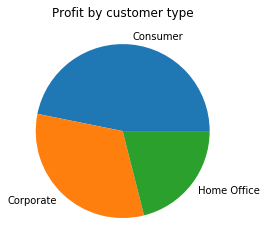

In [43]:
ax = plt.pie(customer_types['profit'].sum(),labels=customer_types.indices)
# plt.legend()
plt.title('Profit by customer type')
plt.show()

In [44]:
customers_groups = df.groupby('customer_name')

In [45]:
customers = customers_groups['sales','quantity', 'profit'].sum()
customers

,sales,quantity,profit
customer_name,,,
Aaron Bergman,886.156,13,129.3465
Aaron Hawkins,1744.700,54,365.2152
Aaron Smayling,3050.692,48,-253.5746
Adam Bellavance,7755.620,56,2054.5885
Adam Hart,3250.337,75,281.1890
...,...,...,...
Xylona Preis,2374.658,100,621.2300
Yana Sorensen,6720.444,58,1778.2923
Yoseph Carroll,5454.350,31,1305.6290


In [46]:
customers.sort_values(by='profit')

,sales,quantity,profit
customer_name,,,
Cindy Stewart,5690.055,40,-6626.3895
Grant Thornton,9351.212,26,-4108.6589
Luke Foster,3930.509,69,-3583.9770
Sharelle Roach,3233.481,34,-3333.9144
Henry Goldwyn,3247.642,68,-2797.9635
...,...,...,...
Adrian Barton,14473.571,73,5444.8055
Hunter Lopez,12873.298,50,5622.4292
Sanjit Chand,14142.334,87,5757.4119


In [47]:
top_10_customers = customers.sort_values(by='profit').tail(10)
top_10_customers

,sales,quantity,profit
customer_name,,,
Daniel Raglin,8350.868,57,2869.0760
Andy Reiter,6608.448,33,2884.6208
Keith Dawkins,8181.256,84,3038.6254
Christopher Martinez,8954.020,34,3899.8904
Tom Ashbrook,14595.620,36,4703.7883
Adrian Barton,14473.571,73,5444.8055
Hunter Lopez,12873.298,50,5622.4292
Sanjit Chand,14142.334,87,5757.4119
Raymond Buch,15117.339,71,6976.0959


## Saving the data after cleaning for further studies